# Messdaten sammeln und darstellen

## Grundidee

Aufgabe der Messtechnik ist es physikalische Messgrößen quantitativ zu beobachten und ist somit wichtiger Bestandteil in der Physik. Eine *quantitative* Beschreibung bedeutet immer, dass eine Messgröße mit einem Zahlenwert, $x$, und einer Maßeinheit, $E$, ausgedrückt wird. Um einen möglichst *guten* Zahlenwert experimentell zu ermitteln, wird neben der konkreten Durchführung ein Großteil der Experimentierzeit damit verbracht das Experiment vorzubereiten und zu planen, aber auch die Daten auszuwerten und darzustellen, Ergebnisse zu überprüfen und ggf. Messungen zu wiederholen. 
Was sich beim Messen nicht umgehen lässt, und was der ein oder andere sicherlich schon im Praktikum beobachten konnte, ist, dass Beobachtungen immer statistischen (zufälligen) Schwankungen unterliegen. Dies führt dazu, dass sich das Messergebnis immer verändert. eine Messung wird prinzipiell niemals den *wahren* Wert liefern können, weshalb wir sorgfältig messen und auswerten müssen. Es gibt *best practice* Methoden und Techniken, die in der Wissenschaft benutzt werden, um Unsicherheiten und Schwankungen der Messgröße quantitativ zu beschreiben um so ein Qualitätsmaß der Messung bzw. unseres Experimentes zu erhalten. Durch die Einhaltung der *best practice* Methoden kannst du jederzeit Rechenschaft ablegen und das Ergebnis begründen. Die grundlegende Norm für die Messtechnik ist in der *DIN-Norm DIN 1319* und dem *GUM* (Guide to the Expression of Uncertainty in Measurement) offiziell festgehalten.

- **Planung:** Was soll gemessen werden? Was wird hierfür benötigt? Welche Fehlerquellen/Störeinflüsse könnten auftreten, bzw. welche sind bekannt? Welche systematischen Unsicherheiten sind bekannt?
- **Durchführung:** Führe Protokoll! Wurde **alles**, was wichtig sein könnte, protokolliert und in Tabellen zusammengefasst, aufgeschrieben, fotografiert?
- **Auswertung:** Prüfe die Ergebnisse auf Vollständigkeit und Übersichtlichkeit! Hierzu gehört auch eine vollständige Abschätzung von Messunsicherheiten.
- **Prüfung:** Ergeben die Ergebnisse Sinn und sind diese konsistent mit anderen Ergebnissen aus der Literatur? Haben wir die Ergebnisse erwartet?
- **Darstellung:** Vollständige Angabe des Messergebnisses, bestehend aus Zahlenwert, Maßeinheit und Messunsicherheit. Verwende die wissenschaftliche Notation für Zehnerpotenzen.

```{seealso}
In den Vorlesungsunterlagen findest du Infos zu [Messen, Einheiten, Kalibrieren](0_Einleitung.ipynb).
```

## Diagramme zeichnen

Mittels Diagrammen (engl. *Plots*) werden Messwerte dargestellt. Die folgenden Regeln helfen dabei, dass die Diagramme anschaulich sind und der Betrachter direkt erkennt, worum es geht:

- **Achsenbeschriftung:** Beschrifte die Achsen richtig, eindeutig und mit vollständiger Angabe: physikalische Größe und Maßeinheit!
- **Skalierung:** Wähle eine passende Skalierung in 1er-/2er-/5er oder 10er- (Dakaden) Schritten
- **Markierungen:** Wähle eine gute erkennbare Markierung für Messpunkte und ggf. eine angebrachte Linienbreite für Kurven. Hierbei können unterschiedliche Farben, Strichdicken, Stricharten und Markierungspunkte verwendet werden, oder eine Kombination. 
- **Titel:** Nutze passende Über-/ oder Unterschriften für das Diagramm, insbesondere wenn diese in der Auswertung im Text erwähnt werden.
- **Anderes:** Weitere Punkte und Linien, die nicht gemessen wurden, sondern nur als *Hilfe* dienen (z.B. Fit-Funktionen, Modelle, Referenzlinien) oder Kommentare sind, sollten besonders gekennzeichnet werden. 
- **Messunsicherheiten:** Für Messwerte (in Form von Fehlerbalken), aber auch für Funktionsterme und Ausgleichsgeraden, müssen Messunsicherheiten in den Graphen angegeben werden. 

```{seealso}
Die Informationen zu [Quellen und Ursachen von Messunsicherheiten](1_Messunsicherheiten.ipynb), [statistischen Messunsicherheiten](1_Mittelwert_StdAbw.ipynb) und [Fehlerfortpflanzung](1_Fehlerfortpflanzung.ipynb) solltet ihr euch vor eurer ersten Praktikumsauswertung umbedingt ansehen.
```

Verwende eine sinnvolle Software für die Datenanalyse und die grafische Darstellung, welche auch Fit-Analysen unterstützen. Wir werden hier im folgenden Beispiele in `python` aufführen und Jupyter Notebooks verwenden. Die Codes auf dieser Seite können direkt benutzt und sogar ausgeführt werden. 
Weitere Software ist Qti-Plot (kostenlos) oder Matlab (Lizenzen über HSU verfügbar).

```{warning}
Alle Beispiele und Tutorials im *Metrology Lecture Book* benutzen `python`. 
```

Im Folgenden sind zwei Diagramme dargestellt, wovon das zweite einige Defizite aufweist. Aufgrund der Darstellung wurde eine lineare Regression über einen anderen Messwertebereich durchgeführt, wodurch der Temperaturanstieg der letzten Jahre um einen Faktor 2 zu gering abgeschätzt wurde! 

`````{admonition} Aufgabe
:class: tip
Welche anderen Defizite fallen dir im Vergleich zum ersten Bild auf?
`````

```{seealso}
Wie du eine Kurve an deine Messdaten anpasst findet du unter [Kurvenanpassung](1_Kurvenanpassung.ipynb) und [Übungen in Python](1_Tutorials.ipynb).
```

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.019°C/Jahr


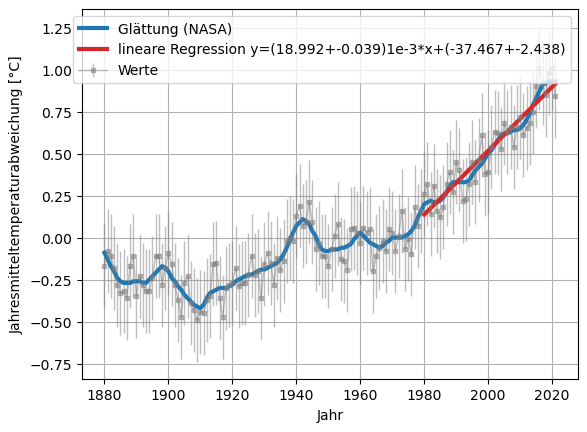

In [3]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

link = 'data/graph.csv' # Beispieldatei mit Klimadaten
global_mean = pd.read_csv(link, header = 1) # Daten einlesen
global_mean["uncertainty"] = 0.25 #Messunsicherheiten abschätzen, hier 0.25K Temperaturgenauigkeit angenommen

# Lineare Regression berechnen:
x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

# print(global_mean) # Eingelesene Daten ausgeben
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=3,  color="tab:blue", label="Glättung (NASA)");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

# Temperaturanstieg ausgeben:
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.008°C/Jahr


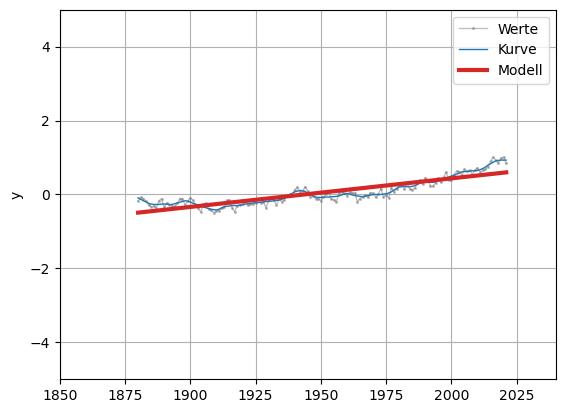

In [4]:
# Lineare Regression berechnen:
x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=1, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=1,  color="tab:blue", label="Kurve");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"Modell");
plt.ylabel("y")
plt.xlim([1850,2040])
plt.ylim([-5,5])
plt.legend();
plt.grid();

# Temperaturanstieg ausgeben:
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")